In [1]:
import boto3
import pandas as pd
import numpy as np

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
## Dropping No and transaction_date
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
from sklearn.model_selection import train_test_split

## Defining the input and target variables
X = house_price.drop(columns = ['house_price_of_unit_area'], axis = 1)
Y = house_price['house_price_of_unit_area']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Building the linear model 
from sklearn.linear_model import LinearRegression
lm_md_1 = LinearRegression().fit(X_train, Y_train)

## Predicting on test
preds_1 = lm_md.predict(X_test)

## Computing the mse
mse_1 = np.mean(np.power(preds_1 - Y_test, 2))
mse_1

56.58445335814463

In [8]:
X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)

lm_md_2 = LinearRegression().fit(X_train_new, Y_train)

## Predicting on test
preds_2 = lm_md_new.predict(X_test_new)

## Computing the mse
mse_2 = np.mean(np.power(preds_2 - Y_test, 2))
mse_2

55.694493326306095

In [9]:
md1_results = []
md2_results = []

for i in range(0, 100):
    
    ## Splitting the data 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    
    ## Model 1
    md1 = LinearRegression().fit(X_train, Y_train)
    pred1 = md1.predict(X_test)
    mse1 = np.mean(np.power(pred1 - Y_test, 2))
    md1_results.append(mse1)
    
    ## Model 2
    md2 = LinearRegression().fit(X_train_new, Y_train)
    pred2 = md2.predict(X_test_new)
    mse2 = np.mean(np.power(pred2 - Y_test, 2))
    md2_results.append(mse2)    

In [10]:
md1_results

[80.65840987603605,
 57.237293556321895,
 124.89449533175572,
 73.3281691738533,
 65.2924951007377,
 97.26772789898072,
 64.34905052997958,
 44.70570840046674,
 71.64812515007804,
 133.60877147897324,
 81.49595752758646,
 74.09308828033915,
 78.78911645523587,
 73.37865283301187,
 138.50533669155195,
 58.66027174236027,
 52.2863017997546,
 55.021190097608255,
 91.25735727283207,
 146.1658183324197,
 66.1482516202027,
 56.010088700796125,
 49.35447334588264,
 140.0891624710483,
 73.91864700382462,
 147.78805682521366,
 62.39267414418292,
 155.17291070455155,
 75.17998345000163,
 50.12245545225392,
 75.58427722606152,
 48.21378819992881,
 81.42572513334011,
 43.63981994036428,
 144.60655975075625,
 79.91308722895039,
 88.12176540355044,
 143.89815666041736,
 67.98150502796811,
 65.05524917568668,
 55.52704819135126,
 101.97993223705416,
 81.85083313929407,
 58.995540588184056,
 50.99566737897615,
 69.87499227991162,
 75.85420529159292,
 92.4332215375262,
 73.77431559485534,
 169.01962857

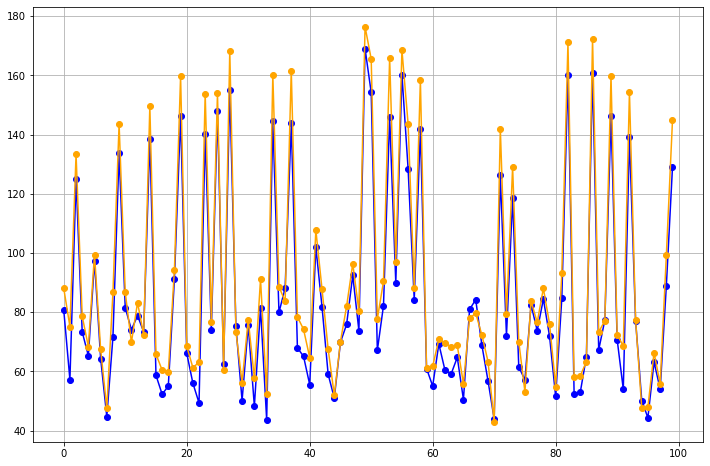

In [14]:
import matplotlib.pyplot as plt

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))

iterations = range(0, 100)
plt.plot(iterations, md1_results, marker = 'o', color = 'blue')
plt.plot(iterations, md2_results, marker = 'o', color = 'orange')
plt.grid()
plt.show()